In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation, Flatten
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [2]:
astro = pd.read_csv("E:/Python Programs/Astro_EuroMillions_1.csv")
sf = pd.read_csv("E:/Python Programs/Astro_EuroMillions_1.csv")
astro.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,Train,Tuesday,Ashwini,NaN,NaN,NaN,3.0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
1,Train,Tuesday,Bharani,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12
2,Train,Tuesday,Krittika,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12
3,Train,Tuesday,Rohini,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12
4,Train,Tuesday,Mrigashirsha,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12,7 15 18 46 49 10 12


In [3]:
astro.fillna(value={"Pada-1":0, "Pada-2":0, "Pada-3":0, "Pada-4":0},inplace=True)

In [4]:
astro["Pada-1"] = astro["Pada-1"].astype(dtype='int32')
astro["Pada-2"] = astro["Pada-2"].astype(dtype='int32')
astro["Pada-3"] = astro["Pada-3"].astype(dtype='int32')
astro["Pada-4"] = astro["Pada-4"].astype(dtype='int32')

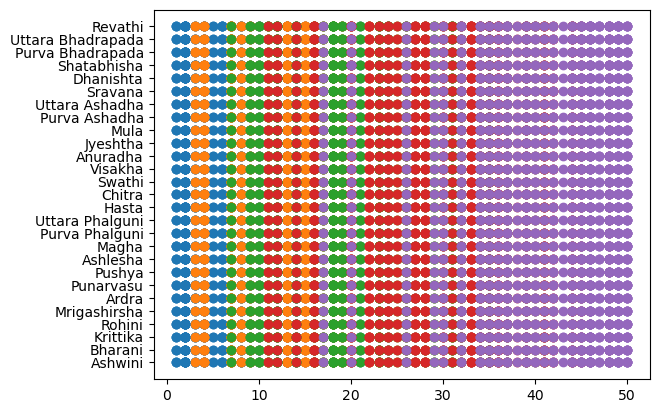

In [5]:
plt.scatter(x="1st Num", y="Nakshatra", data=astro)
plt.scatter(x="2nd Num", y="Nakshatra", data=astro)
plt.scatter(x="3rd Num", y="Nakshatra", data=astro)
plt.scatter(x="4th Num", y="Nakshatra", data=astro)
plt.scatter(x="5th Num", y="Nakshatra", data=astro)
plt.show()

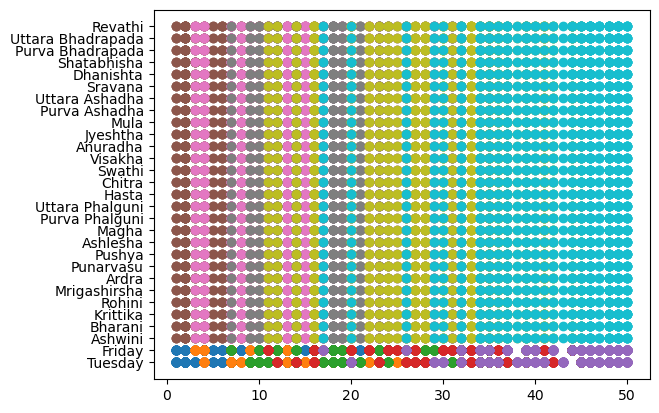

In [6]:
plt.scatter(x="1st Num", y="Day", data=astro)
plt.scatter(x="2nd Num", y="Day", data=astro)
plt.scatter(x="3rd Num", y="Day", data=astro)
plt.scatter(x="4th Num", y="Day", data=astro)
plt.scatter(x="5th Num", y="Day", data=astro)
plt.scatter(x="1st Num", y="Nakshatra", data=astro)
plt.scatter(x="2nd Num", y="Nakshatra", data=astro)
plt.scatter(x="3rd Num", y="Nakshatra", data=astro)
plt.scatter(x="4th Num", y="Nakshatra", data=astro)
plt.scatter(x="5th Num", y="Nakshatra", data=astro)
plt.show()

In [7]:
astro.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
0,Train,Tuesday,Ashwini,0,0,0,3,7,15,18,46,49,10,12,7 15 18 46 49 10 12
1,Train,Tuesday,Bharani,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
2,Train,Tuesday,Krittika,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
3,Train,Tuesday,Rohini,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
4,Train,Tuesday,Mrigashirsha,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12


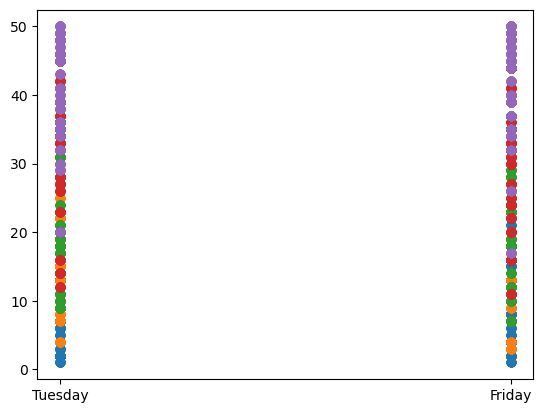

In [8]:
plt.scatter(x="Day",y="1st Num", data=astro)
plt.scatter(x="Day",y="2nd Num", data=astro)
plt.scatter(x="Day",y="3rd Num", data=astro)
plt.scatter(x="Day",y="4th Num", data=astro)
plt.scatter(x="Day",y="5th Num", data=astro)
plt.show()

In [9]:
astro[["Day","5th Num"]].groupby(["Day"]).value_counts()

Day      5th Num
Friday   49         110
         37          83
         44          83
         46          83
         50          82
         45          57
         34          56
         42          55
         47          55
         48          54
         32          29
         39          28
         17          27
         26          27
         40          27
         35          27
Tuesday  46         136
         48         112
         49          82
         45          81
         50          55
         36          55
         39          54
         20          31
         43          29
         47          28
         32          28
         35          28
         38          28
         40          28
         41          27
         34          27
         30          27
         29          27
Name: count, dtype: int64

<Axes: xlabel='Day', ylabel='1st Num'>

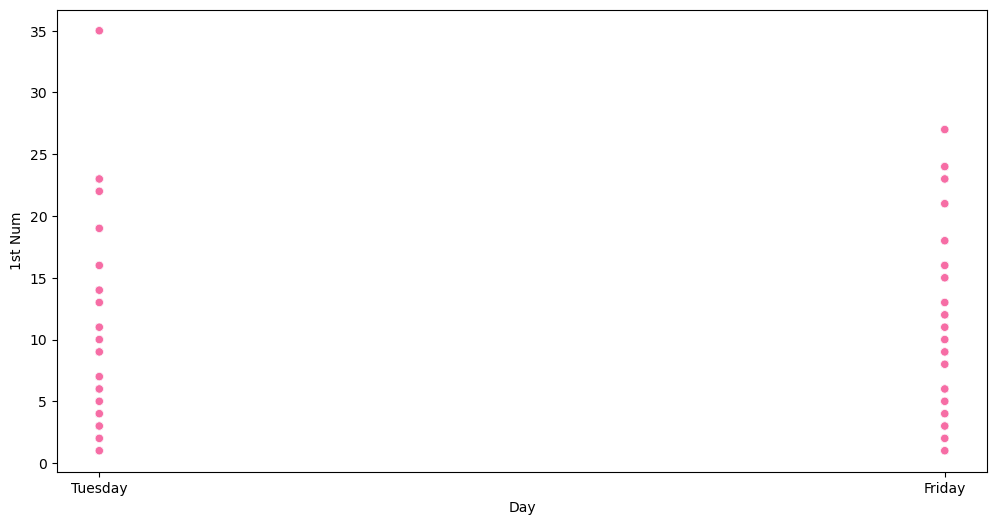

In [10]:
plt.figure(figsize=[12,6])
sns.scatterplot(x="Day",y="1st Num", data=astro,hue="Nakshatra",legend=False)

In [11]:
df = astro[(astro["Day"]=="Tuesday") & ((astro["Nakshatra"]=="Ashlesha") | 
                                 (astro["Nakshatra"]=="Magha") | (astro["Nakshatra"]=="Rohini") | (astro["Nakshatra"]=="Anuradha") |
                                 (astro["Nakshatra"]=="Purva Phalguni") | (astro["Nakshatra"]=="Uttara Bhadrapada") |
                                 (astro["Nakshatra"]=="Purva Bhadrapada") | (astro["Nakshatra"]=="Hasta"))]
df.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
3,Train,Tuesday,Rohini,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
8,Train,Tuesday,Ashlesha,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
9,Train,Tuesday,Magha,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
10,Train,Tuesday,Purva Phalguni,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12
12,Train,Tuesday,Hasta,0,0,0,0,7,15,18,46,49,10,12,7 15 18 46 49 10 12


In [12]:
df.drop(labels=['Data','Winning Numbers'], axis=1, inplace=True)

In [13]:
df.reset_index(inplace=True, drop=True)

In [35]:
df.tail()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star
255,Tuesday,Purva Phalguni,0,2,0,0,1,18,27,41,50,2,12
256,Tuesday,Hasta,0,7,0,0,1,18,27,41,50,2,12
257,Tuesday,Anuradha,0,0,0,0,1,18,27,41,50,2,12
258,Tuesday,Purva Bhadrapada,0,8,0,0,1,18,27,41,50,2,12
259,Tuesday,Uttara Bhadrapada,0,0,0,4,1,18,27,41,50,2,12


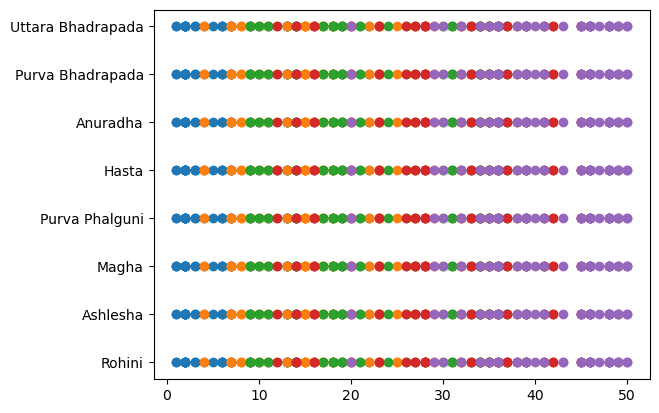

In [15]:
plt.scatter(x="1st Num", y="Nakshatra", data=df)
plt.scatter(x="2nd Num", y="Nakshatra", data=df)
plt.scatter(x="3rd Num", y="Nakshatra", data=df)
plt.scatter(x="4th Num", y="Nakshatra", data=df)
plt.scatter(x="5th Num", y="Nakshatra", data=df)
plt.show()

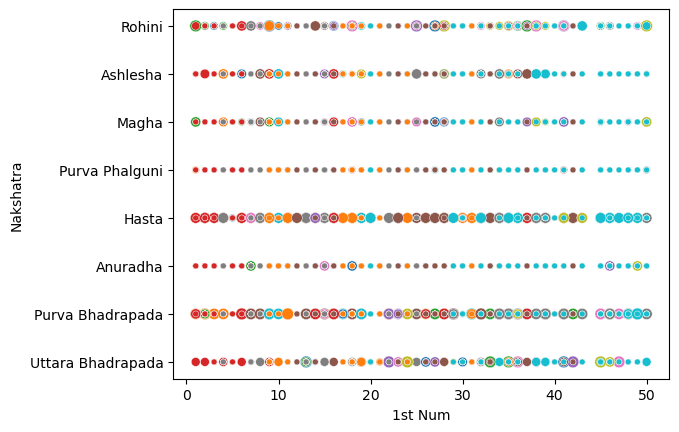

In [16]:
sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-1",legend=False)
sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-2",legend=False)
sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-3",legend=False)
sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-4",legend=False)
sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-1",legend=False)
sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-2",legend=False)
sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-3",legend=False)
sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-4",legend=False)
sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-1",legend=False)
sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-2",legend=False)
sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-3",legend=False)
sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-4",legend=False)
sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-1",legend=False)
sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-2",legend=False)
sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-3",legend=False)
sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-4",legend=False)
sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-1",legend=False)
sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-2",legend=False)
sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-3",legend=False)
sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-4",legend=False)
plt.show()

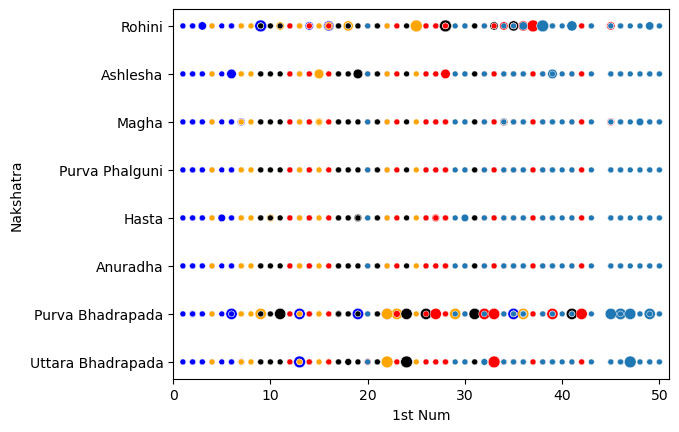

In [40]:
sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-1",legend=False, color='blue')
sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-1",legend=False, color='orange')
sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-1",legend=False, color='black')
sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-1",legend=False, color='red')
sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-1",legend=False)

# sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-2",legend=False,color='blue')
# sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-2",legend=False, color='orange')
# sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-2",legend=False, color='black')
# sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-2",legend=False, color='red')
# sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-2",legend=False)

# sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-3",legend=False, color='blue')
# sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-3",legend=False, color='orange')
# sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-3",legend=False, color='black')
# sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-3",legend=False, color='red')
# sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-3",legend=False)

# sns.scatterplot(data=df, x="1st Num", y="Nakshatra",size="Pada-4",legend=False, color='blue')
# sns.scatterplot(data=df, x="2nd Num", y="Nakshatra",size="Pada-4",legend=False, color='orange')
# sns.scatterplot(data=df, x="3rd Num", y="Nakshatra",size="Pada-4",legend=False, color='black')
# sns.scatterplot(data=df, x="4th Num", y="Nakshatra",size="Pada-4",legend=False, color='red')
# sns.scatterplot(data=df, x="5th Num", y="Nakshatra",size="Pada-4",legend=False)


plt.xlim([0,51])
plt.show()

In [18]:
sf.tail(50)

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star,Winning Numbers
1716,Train,Tuesday,Ardra,NaN,NaN,NaN,NaN,1,18,27,41,50,2,12,1 18 27 41 50 2 12
1717,Train,Tuesday,Punarvasu,NaN,NaN,NaN,NaN,1,18,27,41,50,2,12,1 18 27 41 50 2 12
1718,Train,Tuesday,Pushya,NaN,NaN,NaN,NaN,1,18,27,41,50,2,12,1 18 27 41 50 2 12
1719,Train,Tuesday,Ashlesha,NaN,1.0,NaN,NaN,1,18,27,41,50,2,12,1 18 27 41 50 2 12
1720,Train,Tuesday,Magha,NaN,NaN,5.0,NaN,1,18,27,41,50,2,12,1 18 27 41 50 2 12
1721,Train,Tuesday,Magha,NaN,NaN,6.0,NaN,1,18,27,41,50,2,12,1 18 27 41 50 2 12
1722,Train,Tuesday,Purva Phalguni,NaN,2.0,NaN,NaN,1,18,27,41,50,2,12,1 18 27 41 50 2 12
1723,Train,Tuesday,Uttara Phalguni,NaN,NaN,NaN,NaN,1,18,27,41,50,2,12,1 18 27 41 50 2 12
1724,Train,Tuesday,Hasta,NaN,7.0,NaN,NaN,1,18,27,41,50,2,12,1 18 27 41 50 2 12
1725,Train,Tuesday,Chitra,NaN,NaN,NaN,NaN,1,18,27,41,50,2,12,1 18 27 41 50 2 12


In [19]:
sf.set_index(keys = ["Day", "Nakshatra"], inplace=True)
sf.head()

Data  Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  \
Day     Nakshatra                                                               
Tuesday Ashwini       Train     NaN     NaN     NaN     3.0        7       15   
        Bharani       Train     NaN     NaN     NaN     NaN        7       15   
        Krittika      Train     NaN     NaN     NaN     NaN        7       15   
        Rohini        Train     NaN     NaN     NaN     NaN        7       15   
        Mrigashirsha  Train     NaN     NaN     NaN     NaN        7       15   

                      3rd Num  4th Num  5th Num  1st Lucky Star  \
Day     Nakshatra                                                 
Tuesday Ashwini            18       46       49              10   
        Bharani            18       46       49              10   
        Krittika           18       46       49              10   
        Rohini             18       46       49              10   
        Mrigashirsha       18       46       49              10   

                      2nd Lucky Star      Winning Numbers  
Day     Nakshatra                                          
Tuesday Ashwini                   12  7 15 18 46 49 10 12  
        Bharani                   12  7 15 18 46 49 10 12  
        Krittika                  12  7 15 18 46 49 10 12  
        Rohini                    12  7 15 18 46 49 10 12  
        Mrigashirsha              12  7 15 18 46 49 10 12

In [20]:
sf.drop(labels=["Data"], axis=1, inplace=True)
sf.head()

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  \
Day     Nakshatra                                                        
Tuesday Ashwini          NaN     NaN     NaN     3.0        7       15   
        Bharani          NaN     NaN     NaN     NaN        7       15   
        Krittika         NaN     NaN     NaN     NaN        7       15   
        Rohini           NaN     NaN     NaN     NaN        7       15   
        Mrigashirsha     NaN     NaN     NaN     NaN        7       15   

                      3rd Num  4th Num  5th Num  1st Lucky Star  \
Day     Nakshatra                                                 
Tuesday Ashwini            18       46       49              10   
        Bharani            18       46       49              10   
        Krittika           18       46       49              10   
        Rohini             18       46       49              10   
        Mrigashirsha       18       46       49              10   

                      2nd Lucky Star      Winning Numbers  
Day     Nakshatra                                          
Tuesday Ashwini                   12  7 15 18 46 49 10 12  
        Bharani                   12  7 15 18 46 49 10 12  
        Krittika                  12  7 15 18 46 49 10 12  
        Rohini                    12  7 15 18 46 49 10 12  
        Mrigashirsha              12  7 15 18 46 49 10 12

In [21]:
sf.fillna(value={"Pada-1":0, "Pada-2":0, "Pada-3":0, "Pada-4":0},inplace=True)

In [22]:
sf["Pada-1"] = sf["Pada-1"].astype(dtype='int32')
sf["Pada-2"] = sf["Pada-2"].astype(dtype='int32')
sf["Pada-3"] = sf["Pada-3"].astype(dtype='int32')
sf["Pada-4"] = sf["Pada-4"].astype(dtype='int32')

In [23]:
sf.index

MultiIndex([('Tuesday',           'Ashwini'),
            ('Tuesday',           'Bharani'),
            ('Tuesday',          'Krittika'),
            ('Tuesday',            'Rohini'),
            ('Tuesday',      'Mrigashirsha'),
            ('Tuesday',             'Ardra'),
            ('Tuesday',         'Punarvasu'),
            ('Tuesday',            'Pushya'),
            ('Tuesday',          'Ashlesha'),
            ('Tuesday',             'Magha'),
            ...
            ( 'Friday',          'Jyeshtha'),
            ( 'Friday',              'Mula'),
            ( 'Friday',     'Purva Ashadha'),
            ( 'Friday',    'Uttara Ashadha'),
            ( 'Friday',           'Sravana'),
            ( 'Friday',         'Dhanishta'),
            ( 'Friday',       'Shatabhisha'),
            ( 'Friday',  'Purva Bhadrapada'),
            ( 'Friday', 'Uttara Bhadrapada'),
            ( 'Friday',           'Revathi')],
           names=['Day', 'Nakshatra'], length=1766)

In [24]:
# ((astro["Nakshatra"]=="Punarvasu") | (astro["Nakshatra"]=="Hasta") | (astro["Nakshatra"]=="Krittika") | 
#                                  (astro["Nakshatra"]=="Ashlesha") | (astro["Nakshatra"]=="Rohini") | (astro["Nakshatra"]=="Pushya") |
#                                  (astro["Nakshatra"]=="Purva Bhadrapada") | (astro["Nakshatra"]=="Uttara Bhadrapada"))

In [25]:
sf.loc[("Tuesday", "Punarvasu")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day     Nakshatra                                                              
Tuesday Punarvasu       0       0       0       0        7       15       18   
        Punarvasu       0       0       0       0        2        9       12   
        Punarvasu       0       0       0       0       10       18       21   
        Punarvasu       0       0       0       0       14       23       39   
        Punarvasu       0       0       0       0        5       10       19   
        Punarvasu       0       0       0       0        2        7       21   
        Punarvasu       0       0       0       0       13       17       18   
        Punarvasu       0       0       2       0       23       31       37   
        Punarvasu       0       0       0       0        3        4        9   
        Punarvasu       0       0       0       0        2       15       17   
        Punarvasu       0       0       0       0       13       19       30   
        Punarvasu       0       0       0       0        7       16       18   
        Punarvasu       0       0       0       0        2       13       14   
        Punarvasu       0       0       0       0        1       23       31   
        Punarvasu       0       0       0       0       19       23       26   
        Punarvasu       0       0       0       0       22       29       31   
        Punarvasu       0       0       0       0        6        9       11   
        Punarvasu       0       0       0       0       13       22       24   
        Punarvasu       0       0       0       0       35       36       41   
        Punarvasu       0       0       0       0        2        8       17   
        Punarvasu       0       0       0       0       11       13       14   
        Punarvasu       0       0       0       0       16       18       35   
        Punarvasu       0       0       0       0        6        7        9   
        Punarvasu       0       0       0       0        7       15       34   
        Punarvasu       0       0       0       0        3       11       33   
        Punarvasu       0       5       0       0       14       16       37   
        Punarvasu       0       6       0       0        2        7       34   
        Punarvasu       0       1       0       0        6       15       19   
        Punarvasu       0       0       0       1        2       32       35   
        Punarvasu       0       0       0       0        4        8       10   
        Punarvasu       0       0       0       0        9       25       28   
        Punarvasu       0       0       0       0        1       18       27   

                   4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day     Nakshatra                                                     
Tuesday Punarvasu       46       49              10              12   
        Punarvasu       39       40               1               3   
        Punarvasu       33       45               8              12   
        Punarvasu       48       50               3              12   
        Punarvasu       27       30               5               6   
        Punarvasu       28       45               5              11   
        Punarvasu       20       46               4               9   
        Punarvasu       42       48               3               7   
        Punarvasu       12       20               5               6   
        Punarvasu       23       36               3               8   
        Punarvasu       38       46               4              12   
        Punarvasu       20       32               1               3   
        Punarvasu       26       29               5               6   
        Punarvasu       36       48               5               8   
        Punarvasu       27       46               2              10   
        Punarvasu       39       46               3               7   
        Punarvasu   

In [26]:
sf.loc[("Tuesday", "Hasta")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day     Nakshatra                                                              
Tuesday Hasta           0       0       0       0        7       15       18   
        Hasta           0       0       0       0        2        9       12   
        Hasta           0       0       0       0       10       18       21   
        Hasta           0       0       0       0       14       23       39   
        Hasta           2       0       0       0        5       10       19   
        Hasta           0       0       0       0        2        7       21   
        Hasta           0       0       0       7       13       17       18   
        Hasta           0       0       0       7       23       31       37   
        Hasta           0       0       0       2        3        4        9   
        Hasta           0       0       0       7        3        4        9   
        Hasta           0       0       0       7        2       15       17   
        Hasta           0       0       0       7       13       19       30   
        Hasta           0       0       0       7        7       16       18   
        Hasta           0       0       0       7        2       13       14   
        Hasta           0       0       0       7        1       23       31   
        Hasta           0       0       0       7       19       23       26   
        Hasta           0       0       0       0       22       29       31   
        Hasta           0       0       0       7        6        9       11   
        Hasta           0       0       0       7       13       22       24   
        Hasta           0       0       0       7       35       36       41   
        Hasta           0       0       0       7        2        8       17   
        Hasta           0       0       0       7       11       13       14   
        Hasta           0       0       7       0       16       18       35   
        Hasta           0       0       7       0        6        7        9   
        Hasta           0       0       7       0        7       15       34   
        Hasta           0       0       7       0        3       11       33   
        Hasta           0       0       7       0       14       16       37   
        Hasta           0       0       7       0        2        7       34   
        Hasta           0       7       0       0        6       15       19   
        Hasta           0       7       0       0        2       32       35   
        Hasta           0       7       0       0        4        8       10   
        Hasta           0       7       0       0        9       25       28   
        Hasta           0       7       0       0        1       18       27   

                   4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day     Nakshatra                                                     
Tuesday Hasta           46       49              10              12   
        Hasta           39       40               1               3   
        Hasta           33       45               8              12   
        Hasta           48       50               3              12   
        Hasta           27       30               5               6   
        Hasta           28       45               5              11   
        Hasta           20       46               4               9   
        Hasta           42       48               3               7   
        Hasta           12       20               5               6   
        Hasta           12       20               5               6   
        Hasta           23       36               3               8   
        Hasta           38       46               4              12   
        Hasta           20       32               1               3   
        Hasta           26       29               5               6   
        Hasta           36       48               5               8   
        Has

In [27]:
sf.loc[("Tuesday", "Krittika")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day     Nakshatra                                                              
Tuesday Krittika        0       0       0       0        7       15       18   
        Krittika        0       0       0       0        2        9       12   
        Krittika        0       0       0       0       10       18       21   
        Krittika        0       0       0       0       14       23       39   
        Krittika        0       0       0       0        5       10       19   
        Krittika        0       0       0       0        2        7       21   
        Krittika        0       0       0       0       13       17       18   
        Krittika        0       0       0       0       23       31       37   
        Krittika        0       0       0       0        3        4        9   
        Krittika        0       0       0       0        2       15       17   
        Krittika        0       0       0       0       13       19       30   
        Krittika        0       0       0       0        7       16       18   
        Krittika        0       0       0       0        2       13       14   
        Krittika        0       0       0       0        1       23       31   
        Krittika        0       0       0       0       19       23       26   
        Krittika        3       0       0       0       22       29       31   
        Krittika        3       0       0       0        6        9       11   
        Krittika        3       0       0       0       13       22       24   
        Krittika        0       3       0       0       35       36       41   
        Krittika        0       1       0       0        2        8       17   
        Krittika        0       3       0       0        2        8       17   
        Krittika        0       0       3       1       11       13       14   
        Krittika        0       0       6       1       11       13       14   
        Krittika        0       0       3       0       16       18       35   
        Krittika        2       0       0       5        6        7        9   
        Krittika        2       0       0       3        6        7        9   
        Krittika        0       0       0       3        7       15       34   
        Krittika        0       0       0       0        3       11       33   
        Krittika        0       0       0       0       14       16       37   
        Krittika        0       0       0       2        2        7       34   
        Krittika        9       0       0       0        6       15       19   
        Krittika        0       9       0       0        2       32       35   
        Krittika        0       0       0       9        4        8       10   
        Krittika        0       0       0       0        9       25       28   
        Krittika        0       0       0       0        1       18       27   

                   4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day     Nakshatra                                                     
Tuesday Krittika        46       49              10              12   
        Krittika        39       40               1               3   
        Krittika        33       45               8              12   
        Krittika        48       50               3              12   
        Krittika        27       30               5               6   
        Krittika        28       45               5              11   
        Krittika        20       46               4               9   
        Krittika        42       48               3               7   
        Krittika        12       20               5               6   
        Krittika        23       36               3               8   
        Krittika        38       46               4              12   
        Krittika        20       32               1               3   
        Krittika        26       29               5             

In [28]:
sf.loc[("Tuesday", "Ashlesha")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day     Nakshatra                                                              
Tuesday Ashlesha        0       0       0       0        7       15       18   
        Ashlesha        0       0       0       0        2        9       12   
        Ashlesha        0       0       0       0       10       18       21   
        Ashlesha        0       0       0       0       14       23       39   
        Ashlesha        0       0       0       0        5       10       19   
        Ashlesha        0       0       0       0        2        7       21   
        Ashlesha        0       0       0       0       13       17       18   
        Ashlesha        0       0       0       0       23       31       37   
        Ashlesha        0       0       0       0        3        4        9   
        Ashlesha        0       0       0       0        2       15       17   
        Ashlesha        0       0       0       0       13       19       30   
        Ashlesha        0       0       0       0        7       16       18   
        Ashlesha        0       0       0       0        2       13       14   
        Ashlesha        0       0       0       0        1       23       31   
        Ashlesha        0       0       0       0       19       23       26   
        Ashlesha        0       0       0       0       22       29       31   
        Ashlesha        0       0       0       0        6        9       11   
        Ashlesha        0       0       0       0       13       22       24   
        Ashlesha        0       0       0       0       35       36       41   
        Ashlesha        0       2       0       0        2        8       17   
        Ashlesha        0       0       0       0       11       13       14   
        Ashlesha        0       0       0       0       16       18       35   
        Ashlesha        0       0       0       0        6        7        9   
        Ashlesha        0       0       0       0        7       15       34   
        Ashlesha        0       0       0       0        3       11       33   
        Ashlesha        0       0       0       0       14       16       37   
        Ashlesha        0       0       0       0        2        7       34   
        Ashlesha        5       0       0       0        6       15       19   
        Ashlesha        0       0       0       5        2       32       35   
        Ashlesha        0       6       0       0        4        8       10   
        Ashlesha        0       0       0       6        9       25       28   
        Ashlesha        0       1       0       0        1       18       27   

                   4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day     Nakshatra                                                     
Tuesday Ashlesha        46       49              10              12   
        Ashlesha        39       40               1               3   
        Ashlesha        33       45               8              12   
        Ashlesha        48       50               3              12   
        Ashlesha        27       30               5               6   
        Ashlesha        28       45               5              11   
        Ashlesha        20       46               4               9   
        Ashlesha        42       48               3               7   
        Ashlesha        12       20               5               6   
        Ashlesha        23       36               3               8   
        Ashlesha        38       46               4              12   
        Ashlesha        20       32               1               3   
        Ashlesha        26       29               5               6   
        Ashlesha        36       48               5               8   
        Ashlesha        27       46               2              10   
        Ashlesha        39       46               3               7   
        Ashlesha    

In [29]:
sf.loc[("Tuesday", "Rohini")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day     Nakshatra                                                              
Tuesday Rohini          0       0       0       0        7       15       18   
        Rohini          0       0       0       0        2        9       12   
        Rohini          0       0       0       0       10       18       21   
        Rohini          0       0       0       0       14       23       39   
        Rohini          0       0       0       0        5       10       19   
        Rohini          0       0       0       0        2        7       21   
        Rohini          0       0       0       0       13       17       18   
        Rohini          0       0       0       0       23       31       37   
        Rohini          0       0       0       0        3        4        9   
        Rohini          0       0       0       0        2       15       17   
        Rohini          0       0       0       0       13       19       30   
        Rohini          0       0       0       0        7       16       18   
        Rohini          0       0       0       0        2       13       14   
        Rohini          0       0       0       0        1       23       31   
        Rohini          0       0       0       0       19       23       26   
        Rohini          0       0       0       0       22       29       31   
        Rohini          0       0       0       0        6        9       11   
        Rohini          0       0       0       0       13       22       24   
        Rohini          0       0       0       0       35       36       41   
        Rohini          0       0       0       0        2        8       17   
        Rohini          0       0       0       0       11       13       14   
        Rohini          6       1       0       0       16       18       35   
        Rohini          0       0       0       1        6        7        9   
        Rohini          0       0       0       6        6        7        9   
        Rohini          0       0       0       0        7       15       34   
        Rohini          3       0       0       0        3       11       33   
        Rohini          3       0       0       0       14       16       37   
        Rohini          0       3       0       0        2        7       34   
        Rohini          0       3       0       0        6       15       19   
        Rohini          0       0       3       0        2       32       35   
        Rohini          0       0       3       0        4        8       10   
        Rohini          9       0       2       0        9       25       28   
        Rohini          9       0       3       0        9       25       28   
        Rohini          0       0       9       3        1       18       27   

                   4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day     Nakshatra                                                     
Tuesday Rohini          46       49              10              12   
        Rohini          39       40               1               3   
        Rohini          33       45               8              12   
        Rohini          48       50               3              12   
        Rohini          27       30               5               6   
        Rohini          28       45               5              11   
        Rohini          20       46               4               9   
        Rohini          42       48               3               7   
        Rohini          12       20               5               6   
        Rohini          23       36               3               8   
        Rohini          38       46               4              12   
        Rohini          20       32               1               3   
        Rohini          26       29               5               6   
        Rohini          36       48               5               8   
  

In [30]:
sf.loc[("Tuesday", "Pushya")][:] 

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day     Nakshatra                                                              
Tuesday Pushya          0       0       0       0        7       15       18   
        Pushya          0       0       0       0        2        9       12   
        Pushya          0       0       0       0       10       18       21   
        Pushya          0       0       0       0       14       23       39   
        Pushya          0       0       0       0        5       10       19   
        Pushya          0       0       0       0        2        7       21   
        Pushya          0       0       0       0       13       17       18   
        Pushya          0       0       0       0       23       31       37   
        Pushya          0       0       0       0        3        4        9   
        Pushya          0       0       0       0        2       15       17   
        Pushya          0       0       0       0       13       19       30   
        Pushya          2       0       0       0        7       16       18   
        Pushya          0       0       0       0        2       13       14   
        Pushya          0       0       0       0        1       23       31   
        Pushya          0       0       0       0       19       23       26   
        Pushya          0       0       0       2       22       29       31   
        Pushya          0       0       0       0        6        9       11   
        Pushya          0       0       0       0       13       22       24   
        Pushya          0       0       0       0       35       36       41   
        Pushya          0       0       0       0        2        8       17   
        Pushya          0       0       0       0       11       13       14   
        Pushya          0       0       0       0       16       18       35   
        Pushya          0       0       0       0        6        7        9   
        Pushya          0       0       0       0        7       15       34   
        Pushya          0       0       0       0        3       11       33   
        Pushya          0       0       0       0       14       16       37   
        Pushya          5       0       0       0        2        7       34   
        Pushya          6       0       0       0        6       15       19   
        Pushya          0       0       6       0        2       32       35   
        Pushya          0       1       0       0        4        8       10   
        Pushya          0       0       0       1        9       25       28   
        Pushya          0       0       0       0        1       18       27   

                   4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day     Nakshatra                                                     
Tuesday Pushya          46       49              10              12   
        Pushya          39       40               1               3   
        Pushya          33       45               8              12   
        Pushya          48       50               3              12   
        Pushya          27       30               5               6   
        Pushya          28       45               5              11   
        Pushya          20       46               4               9   
        Pushya          42       48               3               7   
        Pushya          12       20               5               6   
        Pushya          23       36               3               8   
        Pushya          38       46               4              12   
        Pushya          20       32               1               3   
        Pushya          26       29               5               6   
        Pushya          36       48               5               8   
        Pushya          27       46               2              10   
        Pushya          39       46               3               7   
        Pushya      

In [31]:
sf.loc[("Tuesday", "Purva Bhadrapada")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  \
Day     Nakshatra                                                            
Tuesday Purva Bhadrapada       0       0       0       0        7       15   
        Purva Bhadrapada       0       0       0       0        2        9   
        Purva Bhadrapada       0       0       0       0       10       18   
        Purva Bhadrapada       0       0       0       0       14       23   
        Purva Bhadrapada       0       0       0       0        5       10   
        Purva Bhadrapada       0       0       0       0        2        7   
        Purva Bhadrapada       0       0       0       0       13       17   
        Purva Bhadrapada       0       0       0       0       23       31   
        Purva Bhadrapada       0       0       0       0        3        4   
        Purva Bhadrapada       1       0       5       0        2       15   
        Purva Bhadrapada       0       0       1       0       13       19   
        Purva Bhadrapada       0       0       0       0        7       16   
        Purva Bhadrapada       0       6       0       0        2       13   
        Purva Bhadrapada       0       0       0       6        1       23   
        Purva Bhadrapada       8       0       0       0       19       23   
        Purva Bhadrapada       8       9       0       0       22       29   
        Purva Bhadrapada       8       0       0       9        6        9   
        Purva Bhadrapada       8       0       0       0       13       22   
        Purva Bhadrapada       8       0       0       0       35       36   
        Purva Bhadrapada       0       8       0       0        2        8   
        Purva Bhadrapada       0       8       0       0       11       13   
        Purva Bhadrapada       0       8       0       0       16       18   
        Purva Bhadrapada       0       8       0       0        6        7   
        Purva Bhadrapada       0       8       0       0        7       15   
        Purva Bhadrapada       0       8       0       0        3       11   
        Purva Bhadrapada       0       8       0       0       14       16   
        Purva Bhadrapada       0       8       0       0        2        7   
        Purva Bhadrapada       0       8       0       0        6       15   
        Purva Bhadrapada       0       8       0       0        2       32   
        Purva Bhadrapada       0       8       0       0        4        8   
        Purva Bhadrapada       0       8       0       0        9       25   
        Purva Bhadrapada       0       8       0       0        1       18   

                          3rd Num  4th Num  5th Num  1st Lucky Star  \
Day     Nakshatra                                                     
Tuesday Purva Bhadrapada       18       46       49              10   
        Purva Bhadrapada       12       39       40               1   
        Purva Bhadrapada       21       33       45               8   
        Purva Bhadrapada       39       48       50               3   
        Purva Bhadrapada       19       27       30               5   
        Purva Bhadrapada       21       28       45               5   
        Purva Bhadrapada       18       20       46               4   
        Purva Bhadrapada       37       42       48               3   
        Purva Bhadrapada        9       12       20               5   
        Purva Bhadrapada       17       23       36               3   
        Purva Bhadrapada       30       38       46               4   
        Purva Bhadrapada       18       20       32               1   
        Purva Bhadrapada       14       26       29               5   
        Purva Bhadrapada       31       36       48               5   
        Purva Bhadrapada       26       27       46               2   
        Purva Bhadrapada       31       39       46               3   
        Purva Bhadrapada       11       32       49               2   
        Purva Bhadrapada

In [32]:
sf.loc[("Tuesday", "Uttara Bhadrapada")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  \
Day     Nakshatra                                                             
Tuesday Uttara Bhadrapada       0       0       0       0        7       15   
        Uttara Bhadrapada       0       0       0       0        2        9   
        Uttara Bhadrapada       0       0       0       2       10       18   
        Uttara Bhadrapada       0       0       0       0       14       23   
        Uttara Bhadrapada       0       0       0       0        5       10   
        Uttara Bhadrapada       0       0       0       0        2        7   
        Uttara Bhadrapada       0       0       0       0       13       17   
        Uttara Bhadrapada       0       0       0       0       23       31   
        Uttara Bhadrapada       0       0       0       0        3        4   
        Uttara Bhadrapada       0       0       0       0        2       15   
        Uttara Bhadrapada       0       0       5       0       13       19   
        Uttara Bhadrapada       1       0       0       0        7       16   
        Uttara Bhadrapada       0       0       1       0        2       13   
        Uttara Bhadrapada       0       0       0       0        1       23   
        Uttara Bhadrapada       0       0       6       0       19       23   
        Uttara Bhadrapada       0       0       0       0       22       29   
        Uttara Bhadrapada       0       0       0       0        6        9   
        Uttara Bhadrapada       9       0       0       0       13       22   
        Uttara Bhadrapada       0       0       9       0       35       36   
        Uttara Bhadrapada       0       0       0       0        2        8   
        Uttara Bhadrapada       0       0       0       0       11       13   
        Uttara Bhadrapada       0       0       0       0       16       18   
        Uttara Bhadrapada       0       0       0       0        6        7   
        Uttara Bhadrapada       0       0       0       0        7       15   
        Uttara Bhadrapada       0       0       0       0        3       11   
        Uttara Bhadrapada       0       0       0       0       14       16   
        Uttara Bhadrapada       0       0       0       0        2        7   
        Uttara Bhadrapada       0       0       0       4        6       15   
        Uttara Bhadrapada       0       0       0       4        2       32   
        Uttara Bhadrapada       0       0       0       4        4        8   
        Uttara Bhadrapada       0       0       0       4        9       25   
        Uttara Bhadrapada       0       0       0       4        1       18   

                           3rd Num  4th Num  5th Num  1st Lucky Star  \
Day     Nakshatra                                                      
Tuesday Uttara Bhadrapada       18       46       49              10   
        Uttara Bhadrapada       12       39       40               1   
        Uttara Bhadrapada       21       33       45               8   
        Uttara Bhadrapada       39       48       50               3   
        Uttara Bhadrapada       19       27       30               5   
        Uttara Bhadrapada       21       28       45               5   
        Uttara Bhadrapada       18       20       46               4   
        Uttara Bhadrapada       37       42       48               3   
        Uttara Bhadrapada        9       12       20               5   
        Uttara Bhadrapada       17       23       36               3   
        Uttara Bhadrapada       30       38       46               4   
        Uttara Bhadrapada       18       20       32               1   
        Uttara Bhadrapada       14       26       29               5   
        Uttara Bhadrapada       31       36       48               5   
        Uttara Bhadrapada       26       27       46               2   
        Uttara Bhadrapada       31       39       46               3   
        Uttara Bhadrapada       11       32 

In [33]:
sf.loc[("Tuesday", "Visakha")][:]

Pada-1  Pada-2  Pada-3  Pada-4  1st Num  2nd Num  3rd Num  \
Day     Nakshatra                                                              
Tuesday Visakha         0       0       0       0        7       15       18   
        Visakha         0       0       0       0        2        9       12   
        Visakha         0       0       0       0       10       18       21   
        Visakha         0       0       0       0       14       23       39   
        Visakha         0       0       0       0        5       10       19   
        Visakha         0       0       0       0        2        7       21   
        Visakha         0       0       0       0       13       17       18   
        Visakha         0       0       0       0       23       31       37   
        Visakha         0       0       0       0        3        4        9   
        Visakha         0       0       0       0        2       15       17   
        Visakha         0       0       0       0       13       19       30   
        Visakha         0       0       0       0        7       16       18   
        Visakha         0       0       0       0        2       13       14   
        Visakha         0       0       0       0        1       23       31   
        Visakha         0       0       0       0       19       23       26   
        Visakha         0       0       0       0       22       29       31   
        Visakha         0       0       0       0        6        9       11   
        Visakha         0       0       0       0       13       22       24   
        Visakha         0       0       0       0       35       36       41   
        Visakha         0       0       0       0        2        8       17   
        Visakha         0       0       0       0       11       13       14   
        Visakha         0       0       0       0       16       18       35   
        Visakha         0       0       0       0        6        7        9   
        Visakha         0       0       0       0        7       15       34   
        Visakha         0       2       0       0        3       11       33   
        Visakha         0       0       0       0       14       16       37   
        Visakha         0       0       0       0        2        7       34   
        Visakha         0       0       0       0        6       15       19   
        Visakha         0       0       0       2        2       32       35   
        Visakha         0       0       0       0        4        8       10   
        Visakha         0       0       0       0        9       25       28   
        Visakha         0       0       0       0        1       18       27   

                   4th Num  5th Num  1st Lucky Star  2nd Lucky Star  \
Day     Nakshatra                                                     
Tuesday Visakha         46       49              10              12   
        Visakha         39       40               1               3   
        Visakha         33       45               8              12   
        Visakha         48       50               3              12   
        Visakha         27       30               5               6   
        Visakha         28       45               5              11   
        Visakha         20       46               4               9   
        Visakha         42       48               3               7   
        Visakha         12       20               5               6   
        Visakha         23       36               3               8   
        Visakha         38       46               4              12   
        Visakha         20       32               1               3   
        Visakha         26       29               5               6   
        Visakha         36       48               5               8   
        Visakha         27       46               2              10   
        Visakha         39       46               3               7   
        Visakha     

<Axes: xlabel='1st Lucky Star', ylabel='Nakshatra'>

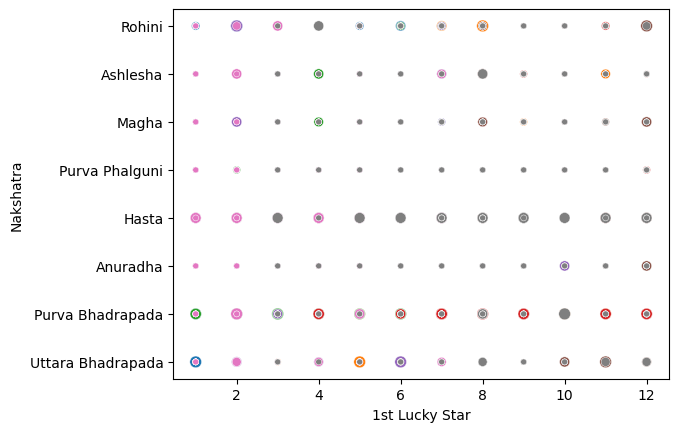

In [34]:
sns.scatterplot(data=df, x="1st Lucky Star", y="Nakshatra",size="Pada-1",legend=False)
sns.scatterplot(data=df, x="2nd Lucky Star", y="Nakshatra",size="Pada-1",legend=False)

sns.scatterplot(data=df, x="1st Lucky Star", y="Nakshatra",size="Pada-2",legend=False)
sns.scatterplot(data=df, x="2nd Lucky Star", y="Nakshatra",size="Pada-2",legend=False)

sns.scatterplot(data=df, x="1st Lucky Star", y="Nakshatra",size="Pada-3",legend=False)
sns.scatterplot(data=df, x="2nd Lucky Star", y="Nakshatra",size="Pada-3",legend=False)

sns.scatterplot(data=df, x="1st Lucky Star", y="Nakshatra",size="Pada-4",legend=False)
sns.scatterplot(data=df, x="2nd Lucky Star", y="Nakshatra",size="Pada-4",legend=False)